In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
Image('graph.png')

We are going to use networkx package to construct the graph and find the shortest paths. Refer to the [NetworkX documentation](https://networkx.github.io/documentation/stable/).

In [3]:
#type in the edges and edgecost as a list of 3-tuples
edges = [(0,1,2),(0,2, 1.5),(0,3, 2.5),(1,4, 1.5),(2,5, 0.5),(4,8, 1),
         (2,6, 2.5),(3,7, 2),(7,9, 1.25),(5,10, 2.75),(6,10, 3.25),
         (9,10, 1.5),(8,10, 3.5)]

#Define an empty graph
G = nx.Graph()

#populate the edges and the cost in graph G
G.add_weighted_edges_from(edges,weight='cost')
list(G.nodes)
#Find the shortest path from Node 0 to Node 10
print(nx.shortest_path(G,0,10,'cost'))
#Find the cost of the shortest path from Node 0 to Node 10
print(nx.shortest_path_length(G,0,10,'cost'))

[0, 2, 5, 10]
4.75


Let us now move onto a grid which represents the robot's operating environment. First convert the grid to a graph.  Then we will use Astar from networkX to find the shortest path

In [4]:
# write the Euclidean function that takes in the
# node x, y and compute the distance
def euclidean(node1, node2):
    x1, y1 = node1
    x2, y2 = node2
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

In [5]:
# use np.load to load a grid of 1s and 0s
# 1 - occupied 0- free
grid = np.load("astar_grid.npy")
print(grid)
# you can define your own start/ end
start = (0, 0)
goal = (0, 19)

# visualize the start/ end and the robot's environment
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.show()

FileNotFoundError: ignored

Convert this grid array into a graph. You have to follow these steps
1. Find the dimensions of grid. Use grid_2d_graph() to initialize a grid graph of corresponding dimensions
2. Use remove_node() to remove nodes and edges of all cells that are occupied

In [6]:
#initialize graph
grid_size=grid.shape
G=nx.grid_2d_graph(*grid_size)

deleted_nodes = 0 # counter to keep track of deleted nodes
#loop to remove nodes
for i in range(grid_size[0]):
  for j in range(grid_size[1]):
     if grid[i,j]==1:
        G.remove_node((i,j))
        deleted_nodes+=1
print(f"removed {deleted_nodes} nodes")
print(f"number of occupied cells in grid {np.sum(grid)}")

NameError: ignored

Visualize the resulting graph using nx.draw(). Note that pos argument for nx.draw() has been given below. The graph is too dense. Try changing the node_size and node_color. You can correlate this graph with the grid's occupied cells

In [7]:
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, node_color='red', node_size=10)


TypeError: ignored

We are 2 more steps away from finding the path!
1. Set edge attribute.  Use set_edge_attributes(). Remember we have to provide a dictionary input: Edge is the key and cost is the value. We can set every move to a neighbor to have unit cost.
2. Use astar_path() to find the path. Set heuristic to be euclidean distance. weight to be the attribute you assigned in step 1

In [10]:
nx.set_edge_attributes(G, {e: 1 for e in G.edges()}, "cost")
astar_path = nx.astar_path(G, start, goal, heuristic=euclidean, weight="cost")

NameError: ignored

In [9]:
astar_path

NameError: ignored

Visualize the path you have computed!

NameError: ignored

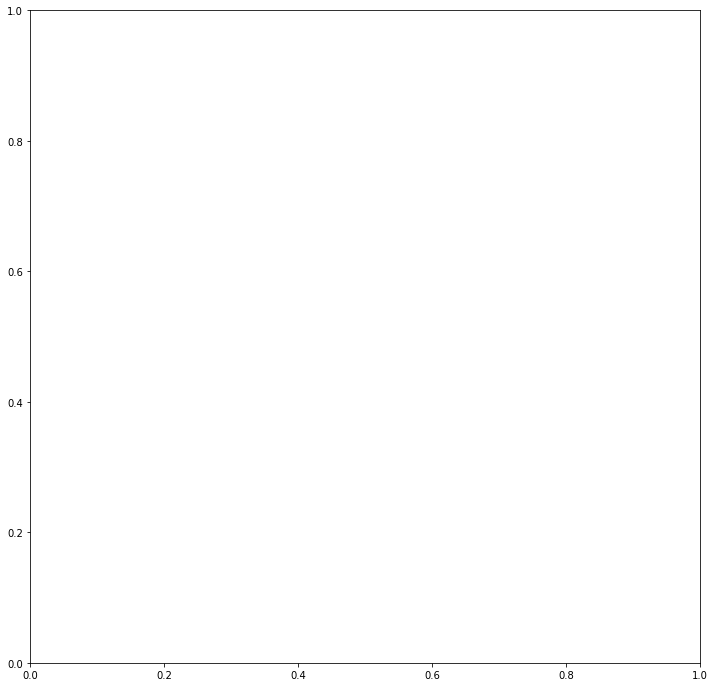

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
for s in astar_path[1:]:
  ax.plot(s[1], s[0],'r+')
  

Cool! Now you can read arbitrary evironments and find the shortest path between 2 robot positions. Pick a game environment from here and repeat: {https://www.movingai.com/benchmarks/dao/index.html}

In [12]:

from PIL import Image
import numpy
  
  
img= Image.open("combat.png")
np_img = numpy.array(img)
  
print(np_img.shape)

FileNotFoundError: ignored

In [13]:
np_img

NameError: ignored